In [1]:
!git clone https://github.com/Leotiv-Vibs/sunglasses_detection.git
%cd sunglasses_detection

Cloning into 'sunglasses_detection'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 12 (delta 3), reused 5 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), 3.81 KiB | 1.27 MiB/s, done.
/content/sunglasses_detection


In [2]:
!gdown --id '1JI1PIPuZS8ZVERknECF8eMXFh03_79s-&confirm=t'

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1JI1PIPuZS8ZVERknECF8eMXFh03_79s-&confirm=t
To: /content/sunglasses_detection/yolov3_training_last.weights
100% 246M/246M [00:07<00:00, 34.5MB/s]


In [3]:
from google.colab.patches import cv2_imshow 
import cv2
import numpy as np
import glob
import random

# Load Yolo
modelWeights = "yolov3_training_last.weights"

net = cv2.dnn.readNet(modelWeights, "yolov3_testing.cfg")

# Name custom object
classes = ["sunglasses"]

#layer_names = net.getLayerNames()
#output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))


0
0
[0]


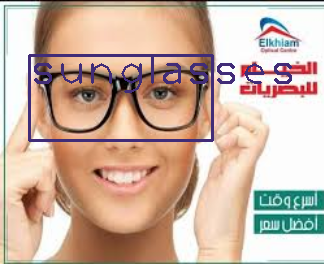

In [4]:
# Images path
images_path = ['/content/1.jpeg']


random.shuffle(images_path)
for img_path in images_path:

    img = cv2.imread(img_path)
    img = cv2.resize(img, None, fx=1.3, fy=1.3)
    height, width, channels = img.shape

    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

    net.setInput(blob)
    outs = net.forward(output_layers)

    class_ids = []
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.3:
                # Object detected
                print(class_id)
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    print(indexes)
    font = cv2.FONT_HERSHEY_PLAIN
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])

            color = colors[class_ids[i]]
            cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
            cv2.putText(img, label, (x, y + 30), font, 3, color, 2)

    cv2_imshow(img)
